In [11]:
%matplotlib notebook
import importlib
import numpy
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

try:
    importlib.reload(wi_parser)
except NameError:
    import wi_parser
    
try:
    importlib.reload(wi_plotter)
except NameError:
    import wi_plotter

In [ ]:
# test loading a particular entry from the CIR file
rxID = 25
cirData25 = wi_parser.loadEntryCIR("data/simple_walk/lora multifreq rosslyn.cir.t002_05.r009.p2m", rxID)
print("{} paths found for rxID {}".format(len(cirData25), rxID))

# test loading all entries from CIR file
cirData = wi_parser.loadAllCIR("data/simple_walk/lora multifreq rosslyn.cir.t002_05.r009.p2m", 9)
# get rid of entries without CIR data
cirData = {rxid:cir for rxid,cir in cirData.items() if len(cir) > 0}
print("{} RX entries found".format(len(cirData)))

In [2]:
# project and data parameters
project="lora multifreq rosslyn"
studyarea="simple walk"
projectdir="data"
txset = 3
txID = 2
rxset = 9

# get transmitter and reciever positions from SQL file
sqlfile = wi_parser.sqlfilename(project=project,
                         studyarea=studyarea,
                         projectdir=projectdir)
print("using SQL file:", sqlfile)

txpos = wi_parser.parsePos(sqlfile, devType="txset", setid=txset)
print("# of TX entries:", len(txpos))
rxpos = wi_parser.parsePos(sqlfile, devType="rxset", setid=rxset)
print("# of RX entries:", len(rxpos))

# find line of sight distances between sets of transmitters and receivers
distances = wi_parser.computeDistancesLOS(txpos, rxpos)
print("# of distance entries:", len(distances))

# find ideal time of arrival between tx and rx devices
toa = wi_parser.computeToaLOS(distances)
print("# of ToA entries:", len(toa))

using SQL file: data/simple walk/lora multifreq rosslyn.simple walk.sqlite
# of TX entries: 5
# of RX entries: 1849
# of distance entries: 9245
# of ToA entries: 9245


In [3]:
# parse CIR entries
cirfile = wi_parser.outputfilename(project=project,
                                   studyarea=studyarea,
                                   output="cir",
                                   txset=txset,
                                   txn=txID, 
                                   rxset=rxset, 
                                   projectdir=projectdir)
print("using output file:", cirfile)
cir = wi_parser.loadAllCIR(cirfile, rxset, txset, txID)
# remove any entries which have zero paths
cir = {linkid:cirentry for linkid,cirentry in cir.items() if len(cirentry) > 0}
print("# of (non empty) CIR entries:", len(cir))

using output file: data/simple walk/lora multifreq rosslyn.cir.t002_03.r009.p2m
# of (non empty) CIR entries: 701


In [4]:
# parse delay spread and location

        
project="lora multifreq rosslyn"
studyarea="simple walk"
projectdir="data"
txset = 3
txid = 2
rxset = 9

dsfile = wi_parser.outputfilename(project=project,
                                   studyarea=studyarea,
                                   output="spread",
                                   txset=txset,
                                   txn=txID, 
                                   rxset=rxset, 
                                   projectdir=projectdir)
print("dsfile:", dsfile)

ds, rxpos2, distances2 = wi_parser.loadDelaySpread(dsfile, rxset, txset, txid)

dsfile: data/simple walk/lora multifreq rosslyn.spread.t002_03.r009.p2m


In [5]:
# compare positions of some of the elements in the SQL file vs delay spread file
# this is to check if the position from the SQL file are interpreted correctly
i = 0
for rxid, pos in rxpos2.items():
    print(rxid)
    print("ds pos:", pos)
    print("sql pos:", rxpos[rxid])
    print()
    i = i+1
    if i > 5:
        break
        
# compare distances in the delay spread file vs distances from the positions
# this is to check if the distances in the delay spread file represent the distances between the tx and rx devices
i = 0
for entryid, dist in distances2.items():
    print(entryid)
    print("SQL distances:", distances[entryid])
    print("ds distances", dist)
    print()
    i = i+1
    if i > 5:
        break

(9, 1)
ds pos: [397.039 334.709  53.034]
sql pos: [397.03912354 334.70932007  53.03404433]

(9, 2)
ds pos: [407.039  334.709   52.8955]
sql pos: [407.03912354 334.70932007  52.89552976]

(9, 3)
ds pos: [417.039 334.709  52.757]
sql pos: [417.03912354 334.70932007  52.75701518]

(9, 4)
ds pos: [427.039  334.709   52.5659]
sql pos: [427.03912354 334.70932007  52.56589586]

(9, 5)
ds pos: [437.039  334.709   52.4896]
sql pos: [437.03912354 334.70932007  52.48960595]

(9, 6)
ds pos: [447.039  334.709   52.4896]
sql pos: [447.03912354 334.70932007  52.48960595]

((3, 2), (9, 1))
SQL distances: 239.9209725428763
ds distances 239.921

((3, 2), (9, 2))
SQL distances: 232.69204908343855
ds distances 232.692

((3, 2), (9, 3))
SQL distances: 225.6748650602343
ds distances 225.675

((3, 2), (9, 4))
SQL distances: 218.897650839966
ds distances 218.898

((3, 2), (9, 5))
SQL distances: 212.35757130463082
ds distances 212.358

((3, 2), (9, 6))
SQL distances: 206.08321369382247
ds distances 206.083



(0.0001, (0.00034+4.1e-05j))
(0.00012, (1.2e-05-1.2e-05j))
(0.000135, (0.00032+7.8e-05j))
(0.00017, (1e-07-2.3e-06j))


<IPython.core.display.Javascript object>


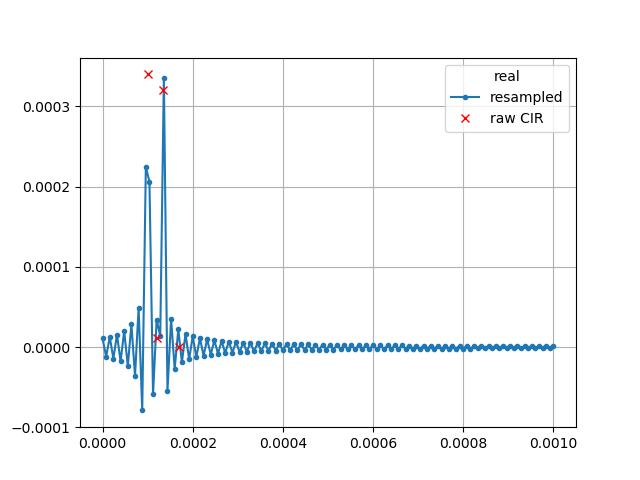

<IPython.core.display.Javascript object>


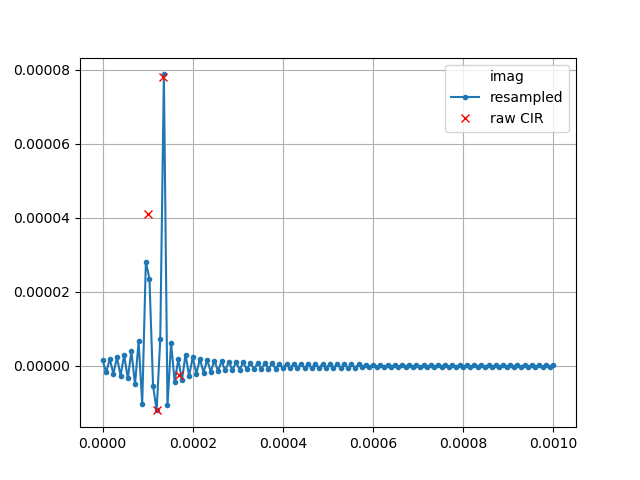

In [10]:
# given a list of times and complex CIRs, find what a narrowband reinterpretation would look like
cirList = [(1e-4, 3.4e-4+4.1e-5j),
           (1.2e-4, 1.2e-5-1.2e-5j),
           (1.35e-4, 3.2e-4+7.8e-5j),
           (1.7e-4, 1e-7-2.3e-6j)]

print(*cirList, sep='\n')

bw = 125e3
ts = 1/bw

y, t = wi_parser.resampleCIR(cirList, ts, 1e-3)
cirArr, tArr = wi_parser.cirListToArray(cirList)

plt.figure()
plt.plot(t, y.real, 'C0.-', label="resampled")
plt.plot(tArr, cirArr.real, 'rx', label="raw CIR")
plt.legend(title="real")
plt.grid()

plt.figure()
plt.plot(t, y.imag, 'C0.-', label="resampled")
plt.plot(tArr, cirArr.imag, 'rx', label="raw CIR")
plt.legend(title="imag")
plt.grid()


plt.show()

<IPython.core.display.Javascript object>


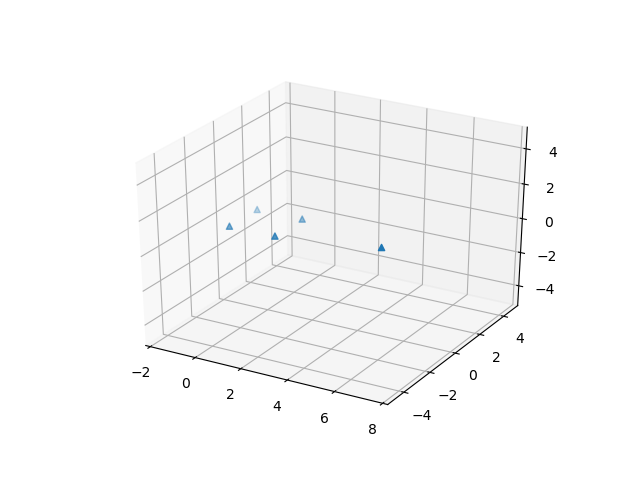

TypeError: auto_scale_xyz() missing 2 required positional arguments: 'X' and 'Y'

In [25]:
# sample application describing how to create 3D scatter plots
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax = fig.gca(projection='3d')

x = [1, -1, 1, -1, 5]
y = [1, 1, -1, -1, 0]
z = [0, 0, 0, 0, 0]
ax.scatter(x, y, z, marker='^')
ax.grid()
ax.set_xlim(-2, 8)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
ax.auto_scale_xyz()

plt.show()

<IPython.core.display.Javascript object>


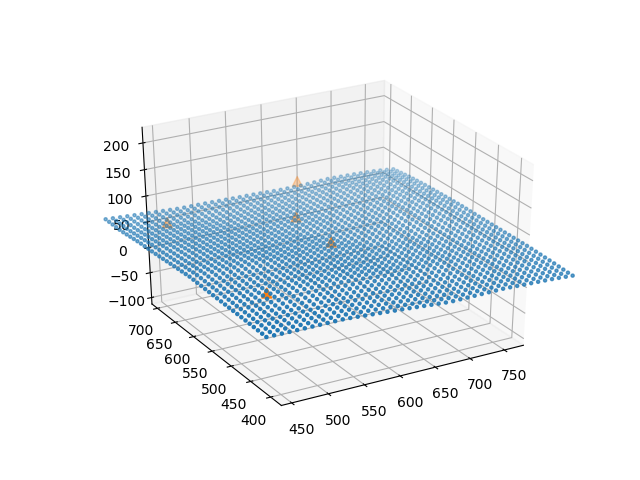

In [32]:
# plot all receivers from rx pos dictionary

# axis scaling helper function
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# plot all devices in a dictionary
def plotPositions(ax, posDict, **plotargs):
    positions = np.zeros((len(posDict), 3))
    for index, (devid, pos) in enumerate(posDict.items()):
        positions[index] = pos
    ax.scatter(positions[:,0], positions[:,1], positions[:,2], **plotargs)


def plotTxRxPos(rxpos, txpos):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plotPositions(ax, rxpos, marker='.', color='C0')
    plotPositions(ax, txpos, marker='^', color='C1', s=50)
    set_axes_equal(ax)
    ax.grid()

plotTxRxPos(rxpos, txpos)

plt.show()